In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('dass_modeling.csv')
df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,voted,married,familysize,major,Depression,Depression_cat,Anxiety,Anxiety_cat,Stress,Stress_cat
0,4,4,2,4,4,4,4,4,2,1,...,2,1,2,No Degree,27,3,34,4,40,4
1,4,1,2,3,4,4,3,4,3,2,...,2,1,4,No Degree,24,3,17,3,27,3
2,3,1,4,1,4,3,1,3,2,4,...,1,1,3,No Degree,39,4,12,2,17,1
3,2,3,2,1,3,3,4,2,3,3,...,2,1,5,Biology,16,2,17,3,16,1
4,2,2,3,4,4,2,4,4,4,3,...,2,1,4,Psychology,32,4,40,4,29,3


In [3]:
plt.style.use('ggplot')

df['country']=pd.factorize(df['country'], sort=True)[0]+1
df['major']=pd.factorize(df['major'], sort=True)[0]+1
df.drop(['Depression_cat','Anxiety_cat', 'Stress_cat'], axis=1, inplace=True)

In [4]:
df

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,religion,orientation,race,voted,married,familysize,major,Depression,Anxiety,Stress
0,4,4,2,4,4,4,4,4,2,1,...,12,1,10,2,1,2,46,27,34,40
1,4,1,2,3,4,4,3,4,3,2,...,7,0,70,2,1,4,46,24,17,27
2,3,1,4,1,4,3,1,3,2,4,...,4,3,60,1,1,3,46,39,12,17
3,2,3,2,1,3,3,4,2,3,3,...,4,5,70,2,1,5,10,16,17,16
4,2,2,3,4,4,2,4,4,4,3,...,10,1,10,2,1,4,56,32,40,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39732,2,1,3,2,3,2,1,3,1,4,...,2,4,60,2,1,2,46,36,12,15
39733,3,4,3,4,3,4,4,4,3,4,...,10,0,10,2,1,4,42,38,34,34
39734,2,1,2,1,1,1,1,1,2,1,...,7,1,30,1,2,3,32,4,1,5
39735,3,1,2,2,3,3,3,4,3,1,...,6,1,60,1,1,2,42,16,13,33


In [5]:
# Slice feature columns from dataframe for X
X = df.drop('major', axis=1)
y = df['major']

In [6]:
# Standardize the features
scaler = StandardScaler()
X_res = scaler.fit_transform(X)

# 95% of variance
pca = PCA(n_components = 0.95)
pca.fit(X_res)
reduced_ninety_five = pca.transform(X_res)
# Determine number of components to capture 95% of the variance
no_comp = reduced_ninety_five.shape[1]
no_comp

48

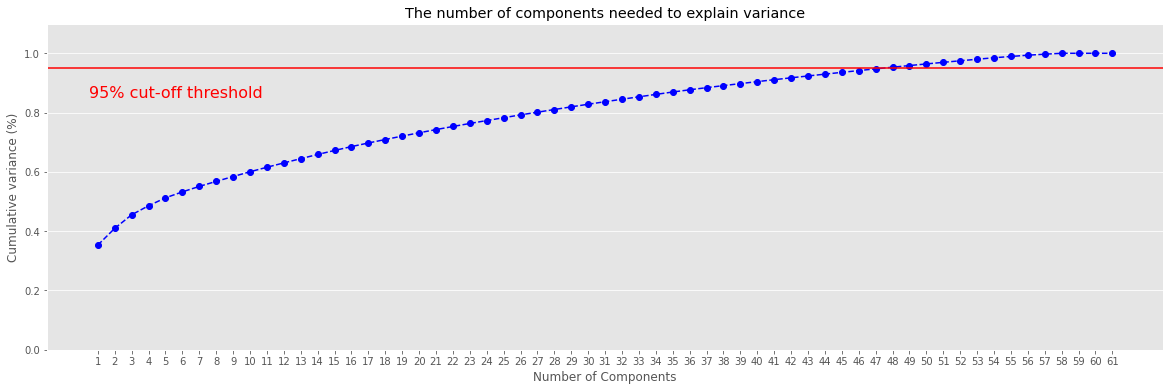

In [7]:
# Visualizing the PCA determination of number of components

pca = PCA().fit(X_res)
X_new = pca.fit_transform(X_res)

plt.rcParams["figure.figsize"] = (20,6)

fig, ax = plt.subplots()
xi = np.arange(1, 62, step=1)
y_pca = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y_pca, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 62, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [8]:
# Create training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X_res, y, test_size=0.3, random_state=42)

# Apply Principal Component Analysis
pca = PCA(n_components = no_comp)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-7.561195,-0.405942,-0.059175,-0.444730,-0.344359,1.016087,0.030993,1.493323,0.909108,0.110569,...,0.059216,0.239847,-0.223151,-0.749859,0.311064,-0.873869,-0.108095,-0.216875,0.370350,0.320799
1,2.135525,-0.019174,-1.161953,-0.398220,-2.360597,1.680599,0.318782,-0.245036,0.921193,0.229600,...,1.055550,0.130350,-0.933643,0.835221,-0.726935,-0.364838,0.328478,-0.879872,-1.112986,-0.724330
2,6.964285,1.789131,2.021946,-0.415127,-0.127340,1.053057,1.100124,-1.066277,-0.045546,-0.751016,...,0.475700,1.588005,-0.396774,-0.292522,0.720089,-0.467893,-0.321933,0.044815,1.079956,0.055412
3,-0.616327,-1.369387,3.019566,-0.965970,-0.191543,-0.411281,-0.462751,0.231266,1.223647,0.551224,...,0.335908,-0.086195,1.411657,-0.544760,-0.221771,-0.835853,-0.082110,1.271339,-0.372578,-1.487431
4,-2.081417,-1.666541,-2.355057,0.905228,1.087651,0.296830,-2.686681,0.216656,0.756696,0.902004,...,-0.318707,1.434309,3.117037,-0.678029,0.277590,-0.071136,0.332060,-0.529230,-0.535094,0.257766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27810,-6.662980,1.500114,2.179109,-0.327582,-0.877272,0.197429,-0.200973,-0.377749,0.557877,0.423346,...,0.832192,0.358550,-0.395112,0.337583,-0.380939,0.824628,0.244704,0.387568,-0.005027,0.062543
27811,1.774921,0.182945,0.153200,-0.279770,0.447945,-0.355619,-2.377333,0.216792,-0.846289,-0.351371,...,0.277401,-0.333207,0.198783,-0.155601,0.493723,0.138367,-0.076679,-0.018739,0.185156,-1.081958
27812,2.685059,1.615950,-0.013040,0.832516,-0.920409,1.843474,1.283114,1.610872,0.634513,-0.772541,...,-1.007938,-1.314928,-1.268145,0.385196,-0.837806,-0.512579,-0.751409,0.349985,-2.432523,1.400087
27813,-7.570032,-0.002804,-1.514873,0.188788,0.124655,-0.599116,0.049438,0.635682,0.870055,0.355727,...,-1.195235,-0.437266,0.474226,0.300249,0.527665,0.131928,-0.423929,0.060905,-0.052232,0.043245


In [9]:
print(pca.explained_variance_ratio_)

[0.35499108 0.05650447 0.04570244 0.0309092  0.02652713 0.02018024
 0.01857767 0.01712688 0.01634655 0.0161292  0.01531094 0.01453638
 0.01409502 0.0136757  0.01351475 0.01265953 0.01205717 0.01152996
 0.01126257 0.01100937 0.01051425 0.01012613 0.00996297 0.00969783
 0.00961186 0.00952053 0.00925539 0.00902066 0.00891869 0.00879349
 0.00851788 0.00838421 0.00819261 0.00813244 0.00809288 0.00744357
 0.00723668 0.00692164 0.00674051 0.0066817  0.00646506 0.00635758
 0.00619601 0.00610649 0.00607938 0.00595531 0.00588987 0.0056305 ]


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
LR.predict(X_test)
round(LR.score(X_test,y_test), 4)

C:\Users\jmortensen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3476

In [ ]:
SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)
SVM.predict(X_test)
round(SVM.score(X_test, y_test), 4)

In [ ]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_train, y_train)
RF.predict(X_test)
round(RF.score(X_test, y_test), 4)

In [ ]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(X_train, y_train)
NN.predict(X_test)
round(NN.score(X_test, y_test), 4)